# Assignment 1: Inspecting the Dataset

In this first assignment, we will get to know the dataset that we will be using throughout. You can find the assignment tasks at the bottom of this document.

Our dataset consists of short texts (article abstracts) from the [PubMed](https://www.ncbi.nlm.nih.gov/pubmed/) database of scientific publications in the Life Science domain. As the full dataset consists of millions of documents, we are using just a small subset, namely all publications that contain the word "influenza" in their title or abstract. You can download that dataset in the form of four files (`influenza_Summaries.pkl.bz2`, etc.) from Canvas. Save these four files in a directory called `data` (do not unpack them, but save them as .bz2 files!), which should be a sub-directory of the one that contains this notebook file (or adjust the file path in the code).

## Importing some Libraries

In [1]:
from collections import namedtuple, defaultdict, Counter
import pickle, bz2

## Loading the Dataset

In [2]:
Summaries_file = 'data/influenza_Summaries.pkl.bz2'
Summaries = pickle.load( bz2.BZ2File( Summaries_file, 'rb' ) )

To make it easier to access the data, we convert here paper entries into [named tuples](http://docs.python.org/3/library/collections.html#collections.namedtuple). This will allow us to refer to fields by keyword (like `var.year`), rather than index (like `var[2]`).

In [3]:
paper = namedtuple( 'paper', ['title', 'authors', 'year', 'doi'] )

for (id, paper_info) in Summaries.items():
    Summaries[id] = paper( *paper_info )

In [4]:
Summaries[28953867]

paper(title='Massively parallel de novo protein design for targeted therapeutics.', authors=['Chevalier A', 'Silva DA', 'Rocklin GJ', 'Hicks DR', 'Vergara R', 'Murapa P', 'Bernard SM', 'Zhang L', 'Lam KH', 'Yao G', 'Bahl CD', 'Miyashita SI', 'Goreshnik I', 'Fuller JT', 'Koday MT', 'Jenkins CM', 'Colvin T', 'Carter L', 'Bohn A', 'Bryan CM', 'Fernández-Velasco DA', 'Stewart L', 'Dong M', 'Huang X', 'Jin R', 'Wilson IA', 'Fuller DH', 'Baker D'], year=2017, doi='10.1038/nature23912')

In [5]:
Summaries[28953867].title

'Massively parallel de novo protein design for targeted therapeutics.'

## Dataset Statistics

The two lines below will install [matplotlib](http://matplotlib.org/) and [NumPy](http://www.numpy.org/), if they are not installed already (if that doesn't work, you might have to download and install them from [here](http://matplotlib.org/downloads.html) and [here](http://sourceforge.net/projects/numpy/files/NumPy/1.10.1/)). We will need these libraries for drawing diagrams and analyzing the data below.

In [6]:
! pip install --user matplotlib
! pip install --user numpy

In [7]:
import matplotlib.pyplot as plt

# show plots inline within the notebook
%matplotlib inline
# set plots' resolution
plt.rcParams['savefig.dpi'] = 100

### Papers per Year

First, we will try to find out how many papers in the dataset were published per year. We are using the [Counter](https://docs.python.org/3/library/collections.html#collections.Counter) class for this.

In [8]:
paper_years = [ p.year for p in Summaries.values() ]
papers_per_year = sorted( Counter(paper_years).items() )

print('Number of papers in the dataset per year for the past decade:')
print(papers_per_year[-10:])

Number of papers in the dataset per year for the past decade:
[(2009, 3736), (2010, 4912), (2011, 5071), (2012, 4776), (2013, 4755), (2014, 4612), (2015, 4339), (2016, 4127), (2017, 4108), (2018, 3743)]


Filtering results, to obain only papers since 1940:

In [9]:
papers_per_year_since_1940 = [ (y,count) for (y,count) in papers_per_year if y >= 1940 ]
years_since_1940 = [ y for (y,count) in papers_per_year_since_1940 ]
nr_papers_since_1940 = [ count for (y,count) in papers_per_year_since_1940 ]

print('Number of papers in the dataset published since 1940:')
print(sum(nr_papers_since_1940))

Number of papers in the dataset published since 1940:
87169


Creating a bar plot to visualize the results (using [matplotlib.pyplot.bar](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.bar)):

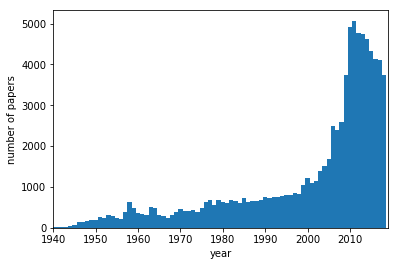

In [10]:
plt.bar(x=years_since_1940, height=nr_papers_since_1940, width=1.0)
plt.xlim(1940, 2019)
plt.xlabel('year')
plt.ylabel('number of papers');

Alternatively, we can get the same result by plotting it as a histogram with [matplotlib.pyplot.hist](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist):

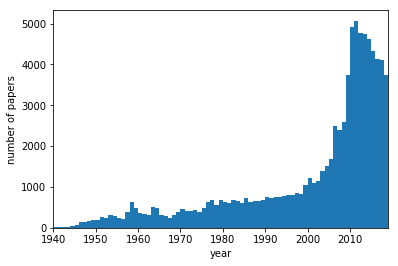

In [11]:
plt.hist( x=[p.year for p in Summaries.values()], bins=range(1940,2020) );
plt.xlim(1940, 2019)
plt.xlabel('year')
plt.ylabel('number of papers');

### Papers per Author

Here, we will obtain the distribution characterizing the number of papers published by an author.

In [12]:
# flattening the list of lists of authors:
flat_author_list = [ auth for paper in Summaries.values() for auth in paper.authors ]

nr_papers_by_author = Counter( flat_author_list )

In [13]:
print('Number of authors in the dataset with distinct names:')
print(len(nr_papers_by_author))

Number of authors in the dataset with distinct names:
164921


In [14]:
print('Top 50 authors with greatest number of papers:')
print(sorted(nr_papers_by_author.items(), key=lambda i:i[1], reverse=True)[:50])

Top 50 authors with greatest number of papers:
[('Webster RG', 715), ('Li Y', 570), ('Kawaoka Y', 525), ('Zhang Y', 485), ('Wang J', 435), ('Chen H', 432), ('Wang X', 413), ('Li X', 388), ('Wang Y', 382), ('Centers for Disease Control and Prevention (CDC).', 358), ('Liu X', 343), ('Palese P', 334), ('Osterhaus AD', 324), ('Li J', 320), ('García-Sastre A', 314), ('Liu Y', 311), ('Liu J', 300), ('Chen Y', 289), ('Webby RJ', 276), ('Zhang X', 271), ('Suzuki Y', 271), ('Chen J', 268), ('Li Z', 265), ('Rimmelzwaan GF', 261), ('Zhang J', 257), ('Peiris JS', 255), ('Katz JM', 253), ('Wang H', 243), ('Guan Y', 240), ('Cowling BJ', 239), ('Kida H', 228), ('Fouchier RA', 227), ('Swayne DE', 226), ('Zhang L', 224), ('Wang M', 223), ('Chen Z', 222), ('Klenk HD', 213), ('Li C', 212), ('Li L', 210), ('Wang L', 210), ('Tumpey TM', 209), ('Zhang H', 201), ('Wu J', 197), ('Yu H', 196), ('Cox NJ', 196), ('Wang S', 191), ('Monto AS', 190), ('Doherty PC', 190), ('Skehel JJ', 186), ('Wang D', 185)]


Then we can create a histogram to visualize the results:

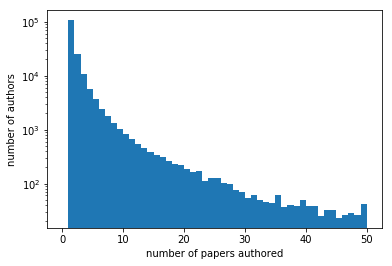

In [15]:
plt.hist( x=list(nr_papers_by_author.values()), bins=range(51), log=True )
plt.xlabel('number of papers authored')
plt.ylabel('number of authors');

### Authors per Paper

Then we can make a similar analysis for the number of authors per paper:

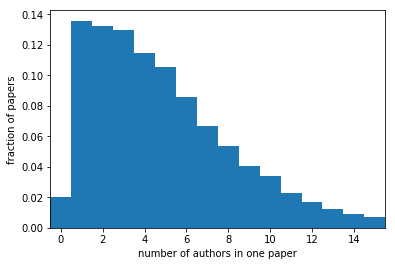

In [16]:
plt.hist( x=[ len(p.authors) for p in Summaries.values() ], bins=range(20), align='left', density=True )
plt.xlabel('number of authors in one paper')
plt.ylabel('fraction of papers')
plt.xlim(-0.5, 15.5);

### Words in Titles

And then we can have a first look into the words we find in titles (applying a very naive word splitting method for now):

In [17]:
words = [ word.lower() for paper in Summaries.values() for word in paper.title.split(' ') ]
word_counts = Counter(words)

print('Number of distinct words in the paper titles:')
print(len(word_counts))

Number of distinct words in the paper titles:
66399


----------

# Tasks

**Your name:** M.A.K. Martodihardjo

### Task 1

Create a Python dictionary object that returns sets of author names for a given year. Name this dictionary `authors_at_year`. (You can use a [*defaultdict*](https://docs.python.org/3/library/collections.html#collections.defaultdict) with a default value of [*set*](https://docs.python.org/3/library/stdtypes.html#set-types-set-frozenset).) Demonstrate the working of this dictionary by showing the author set for the year 1900.

In [18]:
authors_at_year = defaultdict(set)
[ authors_at_year[paper.year].add(author) for paper in Summaries.values() for author in paper.authors ]          
print(authors_at_year[1900])

{'Hossack WC', 'Fleming RA', 'James A'}


### Task 2

Based on the dictionary `authors_at_year` from exercise 1 above, create a plot for the years from 1940 until now that shows how many authors published at least one paper. (You can retrieve the number of unique items in a set `s` with `len(s)`.)

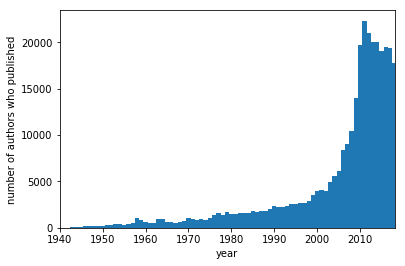

In [19]:
authors_per_year_since_1940 = [ len(authors_at_year[year]) for year in years_since_1940 ]
plt.bar(x=years_since_1940, height=authors_per_year_since_1940, width=1.0);
plt.xlabel('year');
plt.ylabel('number of authors who published');
plt.xlim(1940, 2018);

### Task 3

Print out the top 10 most often occurring words in the papers' titles together with their frequency (in descending order with respect to the frequency). You can make use of the data structures created above.

In [20]:
print('Top 10 most occurring words in titles:')
print(sorted(word_counts.items(), key=lambda i:i[1], reverse=True)[:10])

Top 10 most occurring words in titles:
[('of', 77492), ('influenza', 58016), ('in', 47259), ('and', 41001), ('the', 39224), ('a', 30445), ('virus', 20581), ('with', 13106), ('for', 13099), ('to', 12747)]


### Task 4

Calculate and plot (e.g. using [plt.plot](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot)) a graph of the frequency of the 100 most frequent words in titles of papers, from most frequent to least frequent. (For readability, don't show the actual words.) You can make use of the data structures created above.

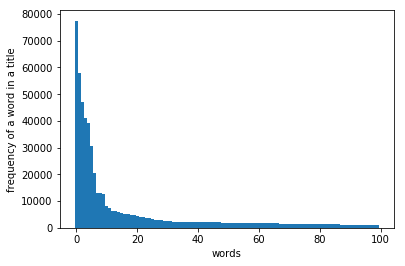

In [21]:
plt.bar(x=range(100), height=sorted(word_counts.values(), reverse=True)[:100], width=1.0);
plt.xlabel('words');
plt.ylabel('frequency of a word in a title');

### Task 5

What do you notice when looking at the top 10 most frequent words? Explain what types of words we find in this top-10 and why.

**Answer:** We notice that when looking at the top 10 of most frequent words, 8 of them are words without a context such as 'of' and 'in'. We find those words more often because they are necessary to build a proper paper title. The only words which show us any context about the paper, are the words 'influenza' and 'virus', which is telling us that there are many scientific publications in this dataset which involved these subjects. The result makes sense since all publications that contain the word "influenza" in their title or abstract are in this PubMed dataset.

# Submission

Submit the answers to the assignment via Canvas as a modified version of this Notebook file (file with `.ipynb` extension) that includes your code and your answers.

Before submitting, restart the kernel and re-run the complete code (**Kernel > Restart & Run All**), and then check whether your assignment code still works as expected.

Don't forget to add your name, and remember that the assignments have to be done individually and group submissions are **not allowed**.